In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob,tqdm
from ipywidgets import interact
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df=pd.read_excel("../데이터파일/train_second.xlsx")
print(df.shape)
df.head(2)

(33155, 58)


,timestamp,week,month,day,hour,minute,dayofweek,playtime,ot,start_time,...,지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),twc,net_temp,status,windchill
0,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,-8.0,0.0,-5.2,-2.3,-0.1,0.9,-10.642905,-1389.729383,2,-6.91
1,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,-8.0,0.0,-5.2,-2.3,-0.1,0.9,-10.642905,-1389.729383,2,-6.91


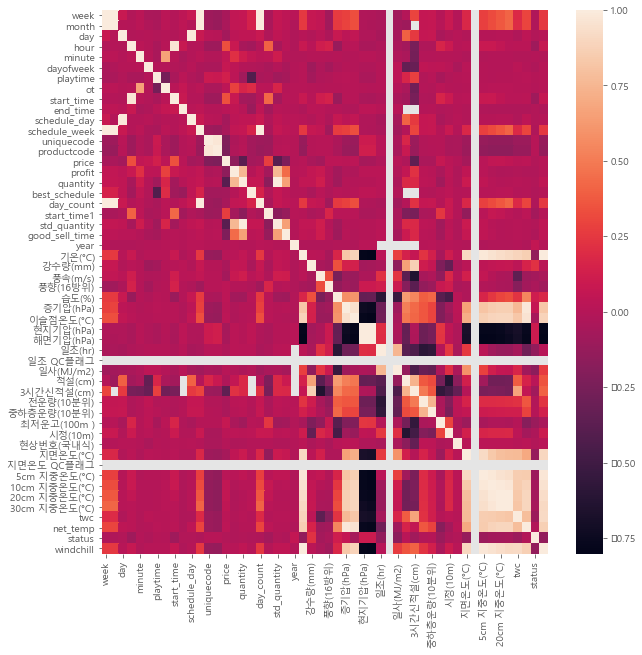

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# 강수량 데이터 정리.

In [4]:
weather = pd.read_excel("../데이터파일/weather.xlsx")
print(weather.shape)
weather.head()

(365, 7)


,time,Precipitation,Average_temperature,Minimum_temperature,Maximum_temperature,Cloud,Relative_humidity
0,2019-01-01,,-5.0,-8.2,-0.6,3.4,49.5
1,2019-01-02,,-4.9,-8.8,0.2,0.0,42.8
2,2019-01-03,,-3.5,-8.4,3.2,0.1,38.8
3,2019-01-04,,-1.1,-6.2,4.1,5.5,55.5
4,2019-01-05,,-2.8,-5.5,1.1,0.5,40.3


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 365 non-null    datetime64[ns]
 1   Precipitation        365 non-null    object        
 2   Average_temperature  365 non-null    float64       
 3   Minimum_temperature  365 non-null    float64       
 4   Maximum_temperature  365 non-null    float64       
 5   Cloud                365 non-null    float64       
 6   Relative_humidity    365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 20.1+ KB


In [6]:
weather.Precipitation.value_counts()

        226
0.0      41
0.2       5
0.3       5
0.1       5
       ... 
4.1       1
2.5       1
0.8       1
1.8       1
22.0      1
Name: Precipitation, Length: 73, dtype: int64

In [7]:
weather.loc[weather["Precipitation"].str.contains("\xa0"),"Precipitation"]=0.0

In [8]:
weather["Precipitation"]=weather["Precipitation"].astype(np.float64)

In [9]:
weather.Precipitation.value_counts()

0.0     267
0.3       5
0.1       5
0.2       5
1.7       4
       ... 
9.8       1
21.1      1
1.3       1
11.8      1
18.8      1
Name: Precipitation, Length: 72, dtype: int64

In [10]:
weather["Precipitation"].describe()

count    365.000000
mean       2.443014
std        8.152785
min        0.000000
25%        0.000000
50%        0.000000
75%        0.200000
max       63.200000
Name: Precipitation, dtype: float64

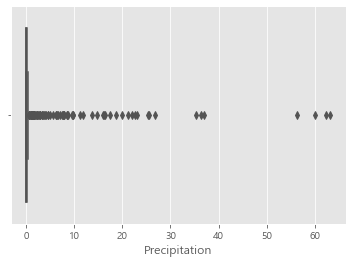

In [11]:
sns.boxplot(weather["Precipitation"])

In [12]:
weather.loc[weather["Precipitation"]>=40,"raining"]="worst"
weather.loc[(weather["Precipitation"]>=30)&(weather["Precipitation"]<40),"raining"]="strong"
weather.loc[(weather["Precipitation"]>=20)&(weather["Precipitation"]<30),"raining"]="shower"
weather.loc[(weather["Precipitation"]>5)&(weather["Precipitation"]<20),"raining"]="bad"
weather.loc[(weather["Precipitation"]>=1)&(weather["Precipitation"]<=5),"raining"]="middle"
weather.loc[(weather["Precipitation"]>=0.0001)&(weather["Precipitation"]<1),"raining"]="little"
weather.loc[(weather["Precipitation"]<0.0001),"raining"]="sunny"

In [13]:
weather.raining.isnull().sum()

0

In [14]:
weather.loc[(weather["Precipitation"]>=20)&(weather["Precipitation"]<30)].shape

(8, 8)

In [15]:
weather.loc[(weather["Precipitation"]>5)&(weather["Precipitation"]<20)].shape

(26, 8)

In [16]:
weather.loc[(weather["Precipitation"]>=1)&(weather["Precipitation"]<=5)].shape

(32, 8)

In [17]:
weather.loc[(weather["Precipitation"]>=0.0001)&(weather["Precipitation"]<1)].shape

(25, 8)

In [18]:
weather.loc[(weather["Precipitation"]<0.0001)].shape

(267, 8)

In [19]:
weather.columns

Index(['time', 'Precipitation', 'Average_temperature', 'Minimum_temperature',
       'Maximum_temperature', 'Cloud', 'Relative_humidity', 'raining'],
      dtype='object')

In [20]:
weather["year"] = weather["time"].dt.year
weather["month"] = weather["time"].dt.month
weather["day"] = weather["time"].dt.day


weather.loc[weather["Cloud"]<=2,"Cloud1"]="맑음"
weather.loc[((weather["Cloud"]>2)&(weather["Cloud"]<=5)),"Cloud1"]="구름조금"
weather.loc[((weather["Cloud"]>5)&(weather["Cloud"]<=8)),"Cloud1"]="구름많음"
weather.loc[weather["Cloud"]>8,"Cloud1"]="흐림"

weather["Cloud1"].isnull().sum()

0

In [21]:
del weather["time"]

In [22]:
df1 = df.merge(weather,on=["year","month","day"],how="outer")

In [23]:
df1.columns

Index(['timestamp', 'week', 'month', 'day', 'hour', 'minute', 'dayofweek',
       'playtime', 'ot', 'start_time', 'end_time', 'schedule_day',
       'schedule_week', 'uniquecode', 'productcode', 'productname', 'category',
       'small_category', 'price', 'profit', 'quantity', 'price_grade',
       'best_schedule', 'day_count', 'start_time1', 'std_quantity',
       'good_sell_time', 'year', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)',
       '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'twc', 'net_temp', 'status',
       'windchill', 'Precipitation', 'Average_temperature',
       'Minimum_temperature', 'Maximum_temperature', 'Cloud',
       'Relative_humidity', 'raining', 'Cloud1'],
      dtype='object')

In [24]:
df1.loc[33152:33154,"Precipitation"]=df1.loc[33151]["Precipitation"]
df1.loc[33152:33154,"Average_temperature"]=df1.loc[33151]["Average_temperature"]
df1.loc[33152:33154,"Minimum_temperature"]=df1.loc[33151]["Minimum_temperature"]
df1.loc[33152:33154,"Maximum_temperature"]=df1.loc[33151]["Maximum_temperature"]
df1.loc[33152:33154,"Cloud"]=df1.loc[33151]["Cloud"]
df1.loc[33152:33154,"Relative_humidity"]=df1.loc[33151]["Relative_humidity"]
df1.loc[33152:33154,"raining"]=df1.loc[33151]["raining"]
df1.loc[33152:33154,"Cloud1"]=df1.loc[33151]["Cloud1"]

In [25]:
df = df1.copy()
df.head()

,timestamp,week,month,day,hour,minute,dayofweek,playtime,ot,start_time,...,status,windchill,Precipitation,Average_temperature,Minimum_temperature,Maximum_temperature,Cloud,Relative_humidity,raining,Cloud1
0,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,2,-6.91,0.0,-5.0,-8.2,-0.6,3.4,49.5,sunny,구름조금
1,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,2,-6.91,0.0,-5.0,-8.2,-0.6,3.4,49.5,sunny,구름조금
2,2019-01-01 06:20:00,1,1,1,6,20,1,20,1,6,...,2,-6.91,0.0,-5.0,-8.2,-0.6,3.4,49.5,sunny,구름조금
3,2019-01-01 06:20:00,1,1,1,6,20,1,20,1,6,...,2,-6.91,0.0,-5.0,-8.2,-0.6,3.4,49.5,sunny,구름조금
4,2019-01-01 06:40:00,1,1,1,6,40,1,20,2,6,...,2,-6.91,0.0,-5.0,-8.2,-0.6,3.4,49.5,sunny,구름조금


# df 를 저장하기 전에 5에서 했던 피쳐를 생성.

### 주말에 영향을 끼치는 카테고리에는 1 아니면 0 
heatmap을 그렸을때, 상대적으로 주말에 영향을 끼친 것을 나타냈다.

In [26]:
df.loc[(df["category"]=="건강기능") & (df["dayofweek"]>4),"weekend_affective"]=1
df.loc[(df["category"]=="이미용") & (df["dayofweek"]>4),"weekend_affective"]=1
df.loc[(df["category"]=="농수축") & (df["dayofweek"]>4),"weekend_affective"]=1
df.weekend_affective.fillna(0,inplace=True)

### 전체 가격 기준에서 하위 10 30 50 70 90까지 상한가 하한가를 구해 매핑을 하였다.
그 이유는 저가 상품일수록 잘 팔리기 때문이다.

In [27]:
total_price_list = np.percentile(df["price"],10),np.percentile(df["price"],30),np.percentile(df["price"],50),np.percentile(df["price"],70),np.percentile(df["price"],90)

In [28]:
df.loc[(df["price"]<=total_price_list[0]),"total_price_grade"]="A"
df.loc[((df["price"]>total_price_list[0])&(df["price"]<=total_price_list[1])),"total_price_grade"]="B"
df.loc[((df["price"]>total_price_list[1])&(df["price"]<=total_price_list[2])),"total_price_grade"]="C"
df.loc[((df["price"]>total_price_list[2])&(df["price"]<=total_price_list[3])),"total_price_grade"]="D"
df.loc[((df["price"]>total_price_list[3])&(df["price"]<=total_price_list[4])),"total_price_grade"]="E"
df.loc[(df["price"]>total_price_list[4]),"total_price_grade"]="F"

### 전에 카테고리별로 상위 15 40 70으로 해서 구간을 나눴는데, 전체 가격에 영향을 끼치지 못하는 것 같아서 수정.
전체 가격이랑 동일한 비율로 카테고리별 10 30 50 70 90을 나타냄.

In [29]:
cate_name = df.category.unique()
base_price_10,base_price_30 ,base_price_50,base_price_70 ,base_price_90= [],[],[],[],[]

for cate in cate_name:
    #print(cate)
    base_price_10.append(np.percentile(df[(df["category"]==cate)]["price"],10))
    base_price_30.append(np.percentile(df[(df["category"]==cate)]["price"],30))
    base_price_50.append(np.percentile(df[(df["category"]==cate)]["price"],50))
    base_price_70.append(np.percentile(df[(df["category"]==cate)]["price"],70))
    base_price_90.append(np.percentile(df[(df["category"]==cate)]["price"],90))
    
for i in range(len(cate_name)):
    print(cate_name[i],base_price_10[i],base_price_30[i],base_price_50[i],base_price_70[i],base_price_90[i])
    df.loc[(df["category"]==cate_name[i]) &  (df["price"]<=base_price_10[i]),"price_grade1"] = "A"
    df.loc[(df["category"]==cate_name[i]) & ((df["price"]>base_price_10[i]) & (df["price"]<=base_price_30[i])),"price_grade1"]="B"
    df.loc[(df["category"]==cate_name[i]) & ((df["price"]>base_price_30[i]) & (df["price"]<=base_price_50[i])),"price_grade1"]="C"
    df.loc[(df["category"]==cate_name[i]) & ((df["price"]>base_price_50[i]) & (df["price"]<=base_price_70[i])),"price_grade1"]="D"
    df.loc[(df["category"]==cate_name[i]) & ((df["price"]>base_price_70[i]) & (df["price"]<=base_price_90[i])),"price_grade1"]="E"
    df.loc[(df["category"]==cate_name[i]) &  (df["price"]>base_price_90[i]),"price_grade1"] = "F"

의류 39900.0 59000.0 69000.0 79000.0 199000.0
속옷 44000.0 59900.0 79000.0 89000.0 119000.0
농수축 30900.0 38900.0 44900.0 55900.0 59900.0
이미용 39800.0 39800.0 49900.0 59000.0 69900.0
가전 549000.0 1250000.0 1449000.0 1900000.0 2700000.0
생활용품 50800.0 99000.0 149000.0 198000.0 440000.0
건강기능 59000.0 59900.0 75050.0 79000.0 178000.0
주방 69800.0 119000.0 158000.0 198000.0 218000.0
잡화 39800.0 59000.0 138000.0 238000.0 1380000.0
가구 548000.0 598000.0 648000.0 749000.0 1249000.0
침구 49900.0 59900.0 69900.0 79900.0 129000.0


### 위 매핑한것에 기반해 카테고리와 전체 상품의 가격의 10 30 50 70 90으로 나눈것에 비슷한 분포를 가진것 끼리 재범주화 하였다.

In [30]:
df.loc[((df["total_price_grade"]=="A")&(df["price_grade1"]=="A")),"category_total_price"]="A"
df.loc[((df["total_price_grade"]=="A")&(df["price_grade1"]=="B")),"category_total_price"]="D"
df.loc[((df["total_price_grade"]=="A")&(df["price_grade1"]=="C")),"category_total_price"]="D"


df.loc[((df["total_price_grade"]=="B")&(df["price_grade1"]=="A")),"category_total_price"]="B"
df.loc[((df["total_price_grade"]=="B")&(df["price_grade1"]=="B")),"category_total_price"]="E"
df.loc[((df["total_price_grade"]=="B")&(df["price_grade1"]=="C")),"category_total_price"]="A"
df.loc[((df["total_price_grade"]=="B")&(df["price_grade1"]=="D")),"category_total_price"]="D"
df.loc[((df["total_price_grade"]=="B")&(df["price_grade1"]=="E")),"category_total_price"]="L"

df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="A")),"category_total_price"]="B"
df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="B")),"category_total_price"]="F"
df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="C")),"category_total_price"]="I"
df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="D")),"category_total_price"]="I"
df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="E")),"category_total_price"]="I"
df.loc[((df["total_price_grade"]=="C")&(df["price_grade1"]=="F")),"category_total_price"]="L"

df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="A")),"category_total_price"]="C"
df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="B")),"category_total_price"]="G"
df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="C")),"category_total_price"]="J"
df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="D")),"category_total_price"]="J"
df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="E")),"category_total_price"]="J"
df.loc[((df["total_price_grade"]=="D")&(df["price_grade1"]=="F")),"category_total_price"]="I"

df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="A")),"category_total_price"]="C"
df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="B")),"category_total_price"]="H"
df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="C")),"category_total_price"]="H"
df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="D")),"category_total_price"]="K"
df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="E")),"category_total_price"]="M"
df.loc[((df["total_price_grade"]=="E")&(df["price_grade1"]=="F")),"category_total_price"]="M"

df.loc[((df["total_price_grade"]=="F")&(df["price_grade1"]=="C")),"category_total_price"]="K"
df.loc[((df["total_price_grade"]=="F")&(df["price_grade1"]=="D")),"category_total_price"]="K"
df.loc[((df["total_price_grade"]=="F")&(df["price_grade1"]=="E")),"category_total_price"]="N"
df.loc[((df["total_price_grade"]=="F")&(df["price_grade1"]=="F")),"category_total_price"]="N"

### 카테고리별 몇시에 시작하는 것에 따라 얼마나 판매 수량에 영향을 받나 살펴 보고
카테고리별 해당 시간에 잘팔리는 기준 값을 매핑하여 나타냄.

In [31]:
X=pd.pivot_table(data=df,index=["category"],columns="start_time1",values="std_quantity",aggfunc="median",fill_value=100)
X1 = X.T.values

In [32]:
a=np.where((X1==100),100,0)
a1=np.where(((X1<5)&(X1>=1.9)),1,0)
a2=np.where((X1>=1.4)&(X1<1.9),2,0)
a3=np.where((X1>=0.9)&(X1<1.4),3,0)
a4=np.where((X1>=0.4)&(X1<0.9),4,0)
a5=np.where((X1>=0)&(X1<0.4),5,0)
a6=np.where((X1>=-0.5)&(X1<0),6,0)
a7=np.where((X1<-0.5),7,0)
mask = a+a1+a2+a3+a4+a5+a6+a7

In [33]:
cate = X.index
category_dict ={}
for i in range(len(cate)):
    category_dict[cate[i]]={"1":[],
                "2":[],
                "3":[],
                "4":[],
                "5":[],
                "6":[],
                "7":[],
               }

In [34]:
for i in range(len(cate)):
    data =mask[:,i]
    m=category_dict[cate[i]]
    for idx in range(len(mask[:,i])):
        if(data[idx]==100):
        #    print("제외",idx+6)
            pass
        elif(data[idx]==1):
            m["1"].append(idx+6)
        elif(data[idx]==2):
            m["2"].append(idx+6)
        elif(data[idx]==3):
            m["3"].append(idx+6)
        elif(data[idx]==4):
            m["4"].append(idx+6)
        elif(data[idx]==5):
            m["5"].append(idx+6)
        elif(data[idx]==6):
            m["6"].append(idx+6)
        elif(data[idx]==7):
            m["7"].append(idx+6)

In [35]:
for i in range(len(category_dict.keys())):
    data = category_dict[cate[i]]
    digit = list(data.keys())
    for j in range(len(digit)):
        val = data[digit[j]]
        if(len(val)==0):
            pass
        else:
            for time in val:
                df.loc[(df["category"]==cate[i]) & (df["start_time1"]==time),"category_start_time1"] = digit[j]

In [36]:
df["category_start_time1"].isna().sum()

0

In [37]:
df.shape

(33155, 71)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33155 entries, 0 to 33154
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             33155 non-null  datetime64[ns]
 1   week                  33155 non-null  int64         
 2   month                 33155 non-null  int64         
 3   day                   33155 non-null  int64         
 4   hour                  33155 non-null  int64         
 5   minute                33155 non-null  int64         
 6   dayofweek             33155 non-null  int64         
 7   playtime              33155 non-null  int64         
 8   ot                    33155 non-null  int64         
 9   start_time            33155 non-null  int64         
 10  end_time              33155 non-null  int64         
 11  schedule_day          33155 non-null  int64         
 12  schedule_week         33155 non-null  int64         
 13  uniquecode      

In [39]:
df.to_excel("../데이터파일/train_third.xlsx",index=False)